In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from centrex_tlf import states, hamiltonian

# Ω basis

In [2]:
QNc = states.generate_coupled_states_excited(Js = [1,2,3,4], Ps=None, Omegas=[-1,1])
qn_select = states.QuantumSelector(J = 1,F1=1/2, F=1, electronic = states.ElectronicState.B)
QNc[qn_select.get_indices(QNc)]

array([|B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>],
      dtype=object)

In [3]:
# generate the X hamiltonian terms
H = hamiltonian.generate_coupled_hamiltonian_B(QNc)

In [4]:
# create a function outputting the hamiltonian as a function of E and B
Hfunc = hamiltonian.generate_coupled_hamiltonian_B_function(H)

# V/cm
Ez = np.linspace(0, 300, 101)

# generate the Hamiltonian for (almost) zero field, add a small field to make states
# non-degenerate
Hi = Hfunc(E=[0, 0, 1e-3], B=[0, 0, 0])
E, V = np.linalg.eigh(Hi)

# get the true superposition-states of the system
QN_states = hamiltonian.matrix_to_states(V, QNc)

# original eigenvectors used in tracking states as energies change order
V_track = V.copy()

In [5]:
energy = np.empty([Ez.size, len(QNc)], dtype=np.complex128)

# iterate over the electric field values
for idx, Ei in tqdm.tqdm(enumerate(Ez), total = len(Ez)):
    Hi = Hfunc(E=[0, 0, Ei], B=[0, 0, 1e-3])
    E, V = np.linalg.eigh(Hi)

    # sort indices to keep the state order the same
    indices = np.argmax(np.abs(V_track.conj().T @ V), axis=1)
    energy[idx, :] = E[indices]
    V_track[:, :] = V[:, indices]

100%|██████████| 101/101 [00:04<00:00, 22.64it/s]


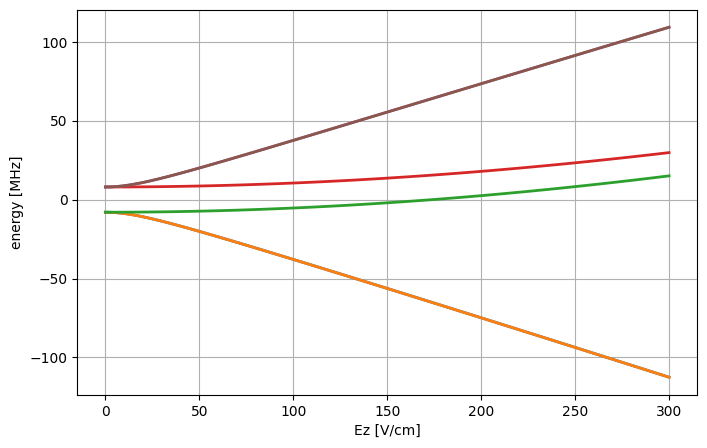

In [6]:
indices = qn_select.get_indices(QNc)

y = energy[:,indices].real.copy()
y -= y[0].mean()
y /= 2*np.pi*1e6

energy[:,indices] 
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(Ez, y, lw = 2)
ax.set_xlabel("Ez [V/cm]")
ax.set_ylabel("energy [MHz]")
ax.grid(True)

In [7]:
states_omega_basis = [QN_states[idx] for idx in indices]
energy_omega_basis = y.copy()

# Parity Basis

In [8]:
QNc = states.generate_coupled_states_excited(Js = [1,2,3,4], Ps=[-1,1], Omegas=1)
qn_select = states.QuantumSelector(J = 1,F1=1/2, F=1, electronic = states.ElectronicState.B)
QNc[qn_select.get_indices(QNc)]

array([|B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>,
       |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>],
      dtype=object)

In [9]:
# generate the X hamiltonian terms
H = hamiltonian.generate_coupled_hamiltonian_B(QNc)

In [10]:
# create a function outputting the hamiltonian as a function of E and B
Hfunc = hamiltonian.generate_coupled_hamiltonian_B_function(H)

# V/cm
Ez = np.linspace(0, 300, 101)

# generate the Hamiltonian for (almost) zero field, add a small field to make states
# non-degenerate
Hi = Hfunc(E=[0, 0, 1e-3], B=[0, 0, 0])
E, V = np.linalg.eigh(Hi)

# get the true superposition-states of the system
QN_states = hamiltonian.matrix_to_states(V, QNc)

# original eigenvectors used in tracking states as energies change order
V_track = V.copy()

In [11]:
energy = np.empty([Ez.size, len(QNc)], dtype=np.complex128)

# iterate over the electric field values
for idx, Ei in tqdm.tqdm(enumerate(Ez), total = len(Ez)):
    Hi = Hfunc(E=[0, 0, Ei], B=[0, 0, 1e-3])
    E, V = np.linalg.eigh(Hi)

    # sort indices to keep the state order the same
    indices = np.argmax(np.abs(V_track.conj().T @ V), axis=1)
    energy[idx, :] = E[indices]
    V_track[:, :] = V[:, indices]

100%|██████████| 101/101 [00:04<00:00, 23.07it/s]


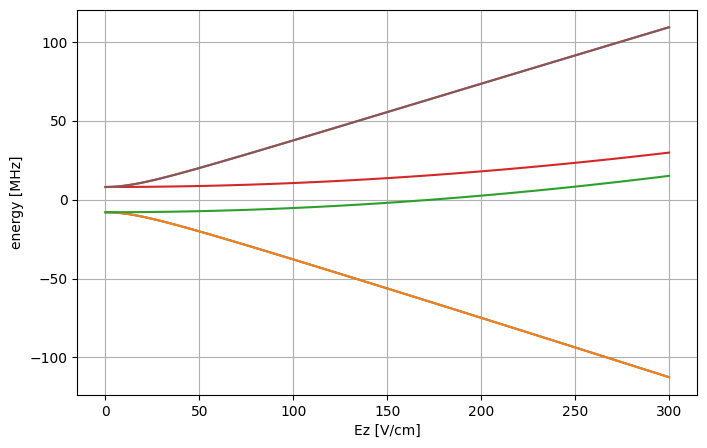

In [12]:
indices = qn_select.get_indices(QNc)

y = energy[:,indices].real.copy()
y -= y[0].mean()
y /= 2*np.pi*1e6

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(Ez, y)
ax.set_xlabel("Ez [V/cm]")
ax.set_ylabel("energy [MHz]")
ax.grid(True)

In [13]:
states_parity_basis = [QN_states[idx] for idx in indices]

In [14]:
indices_sorted = []
for s in states_parity_basis:
    for ido, so in enumerate([s.transform_to_parity_basis() for s in states_omega_basis]):
        if s.largest == so.largest:
            print(ido, s.largest)
            indices_sorted.append(ido)

0 |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
1 |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
2 |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
3 |B, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
4 |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
5 |B, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>


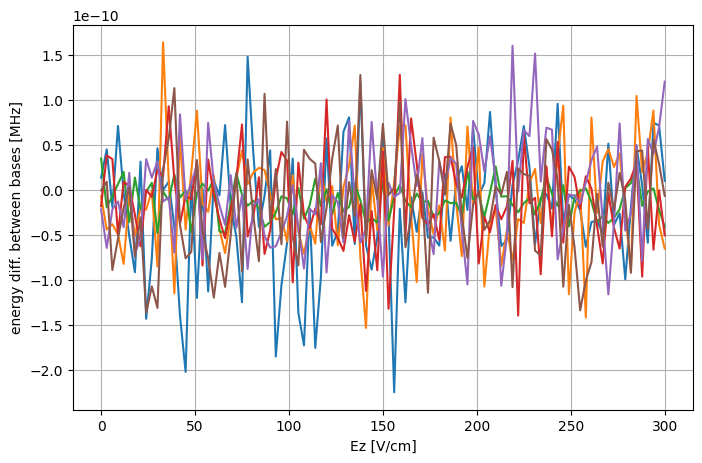

In [15]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(Ez, y - energy_omega_basis[:,indices_sorted])
ax.set_xlabel("Ez [V/cm]")
ax.set_ylabel("energy diff. between bases [MHz]")
ax.grid(True)